objective - explore features looking for correlation

pca hue by score

scatter avg housing 21 to score

heat map of features, 

run predictive_power - or should this go into preprocessing? 


In [67]:

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import dabl

## Load joined data set 
- drop columns
- clean up names

In [178]:
df = pd.read_csv('../../data/by_student_group/grocery_added.csv',low_memory=False)
df.drop(columns=['Unnamed: 0','National School Lunch Program [Public School] 2020-21',
                'County Name_y','District Name_y', 'School Name_y' ],inplace=True)
df.rename(columns ={'County Name_x':'County_Name','District Name_x':'District_Name',
                    'School Name_x':'School_Name',
'Total Students, All Grades (Excludes AE) [Public School] 2020-21':'Total_Students(No-AE)',
'Total Students, All Grades (Includes AE) [Public School] 2020-21':'Total_Students(With-AE)',
'Grades 1-8 Students [Public School] 2020-21':'1-8th_Students',
    'Pupil/Teacher Ratio [Public School] 2020-21':'Pupil/Teacher-Ratio',
       'Grades 9-12 Students [Public School] 2020-21':'9-12_Students',
        'Full-Time Equivalent (FTE) Teachers [Public School] 2020-21':'FTE_Teachers',
                    'Hispanic - male [Public School] 2020-21':'Hispanic_Male',
       'Hispanic - female [Public School] 2020-21':'Hispanic_Female',
       'Black or African American - male [Public School] 2020-21':'Black_or_AA_M',
       'Black or African American - female [Public School] 2020-21':'Black_or_AA_F',},inplace=True)
df.shape

(316683, 98)

## Convert to numeric to be used in county averages

In [50]:
df[['Total_Students(No-AE)',
       'Total_Students(With-AE)', '1-8th_Students', '9-12_Students',
       'FTE_Teachers', 'Pupil/Teacher-Ratio', 'Hispanic_Male',
       'Hispanic_Female', 'Black_or_AA_M', 'Black_or_AA_F']] =df[['Total_Students(No-AE)',
       'Total_Students(With-AE)', '1-8th_Students', '9-12_Students',
       'FTE_Teachers', 'Pupil/Teacher-Ratio', 'Hispanic_Male',
       'Hispanic_Female', 'Black_or_AA_M', 'Black_or_AA_F']].apply(pd.to_numeric,errors='coerce')

## Generate county averages for key features for analysis

In [179]:
dfc = df[df['Grade']==11][[ 'County_Name',
                           'Avg_21',# housing average price
                           'Mean Scale Score', # target column 
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above',
       'Percentage Standard Nearly Met', 'Percentage Standard Not Met',
            # free and reduced data
        'Enrollment', 'Free_Meal_count',
       'Percent_Eligible', 'FRPM_Count', 'Percent_Eligible_FRPM',
      'Free_Meal_Count', 'Percent_Eligible_Free', 
                           # geography
        'Latitude', 'Longitude',
                           # student numbers
        'Total_Students(No-AE)', 'Total_Students(With-AE)',
       '9-12_Students', 
       'Pupil/Teacher-Ratio', 'Hispanic_Male', 'Hispanic_Female',
       'Black_or_AA_M', 'Black_or_AA_F',
                           # teacher stats
                           'FTE_Teachers','Lowest Salary Offered',
       'Average Salary Paid', 'Highest Entry Level Step',
       'Highest Salary Offered',
                           # expense stats per district 
                           'EDP 365',
       'Current\nExpense ADA', 'Current\nExpense Per ADA',
                           # population 
        'Estimated Total Population', 'Estimated Population 5-17',
       'est_num_u17_pov', 
                           # yelp data
                           'Grocery_3mile', 'Grocery_dist'
                          ]]

In [180]:
county_avg=dfc.groupby('County_Name').agg('mean')
county_avg.sample(4)

,Avg_21,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Enrollment,Free_Meal_count,Percent_Eligible,...,Highest Entry Level Step,Highest Salary Offered,EDP 365,Current\nExpense ADA,Current\nExpense Per ADA,Estimated Total Population,Estimated Population 5-17,est_num_u17_pov,Grocery_3mile,Grocery_dist
County_Name,,,,,,,,,,,,,,,,,,,,,
Sutter,448734.347150,2546.002591,12.964223,20.594223,33.558756,22.513990,43.926762,1146.808290,638.108808,0.561328,...,11.937824,94797.318653,7.825299e+07,6309.222443,12344.054124,40890.191586,7554.959289,1202.178140,23.538043,1594.236994
Ventura,760650.225363,2587.937455,22.475084,23.413324,45.888364,23.168233,30.943593,1552.252364,631.808000,0.368505,...,7.758344,103652.463473,1.842450e+08,14673.623881,12423.737744,192572.029581,17622.412503,1798.427340,37.021417,2022.023888
Sonoma,819102.107505,2588.983214,19.703804,26.313036,46.017446,25.587196,28.395286,804.973734,254.365854,0.315611,...,10.623125,93182.045778,3.005013e+07,2201.660423,14446.766003,30453.677434,2831.676962,185.091107,29.820513,1512.195266
Stanislaus,411059.833943,2537.785714,12.322621,19.059907,31.382398,22.405273,46.212075,1148.521739,647.069565,0.517875,...,19.691616,105325.217101,9.234801e+07,6847.003858,13648.951503,40441.268191,7555.734139,1159.196294,28.489969,1834.126543


In [181]:
county_avg.to_csv('../../data/by_student_group/county_averages.csv')

## a couple counties did not report cetain metrics as well as there was loss in data between joins.  

In [138]:
county_avg[county_avg.isnull().any(axis=1)].T

County_Name,Mariposa,Mono,Napa,San Francisco,Sierra,Trinity
Avg_21,3.512920e+05,5.034759e+05,1.805507e+06,1.110435e+06,2.272530e+05,2.984843e+05
Mean Scale Score,2.606497e+03,2.599873e+03,2.625911e+03,2.565347e+03,2.601478e+03,2.585413e+03
Percentage Standard Exceeded,2.921155e+01,2.382455e+01,3.003609e+01,1.364420e+01,2.329389e+01,2.216600e+01
Percentage Standard Met,2.245085e+01,2.805591e+01,2.703957e+01,2.556358e+01,1.750889e+01,2.357364e+01
Percentage Standard Met and Above,5.166197e+01,5.188030e+01,5.707565e+01,3.920753e+01,4.080056e+01,4.574055e+01
Percentage Standard Nearly Met,2.336634e+01,2.239909e+01,2.418152e+01,2.520395e+01,4.721278e+01,2.761018e+01
Percentage Standard Not Met,2.497056e+01,2.571985e+01,1.874261e+01,3.558815e+01,1.198444e+01,2.664945e+01
Enrollment,2.095352e+02,2.710000e+02,4.630000e+02,3.234321e+02,1.620000e+02,2.136545e+02
Free_Meal_count,9.219718e+01,1.055152e+02,1.630000e+02,2.022716e+02,5.400000e+01,1.073636e+02
Percent_Eligible,4.702827e-01,3.840210e-01,3.520518e-01,5.970907e-01,3.333333e-01,5.985267e-01


In [141]:
## fill Na for counties by column to allow for scaling to be completed

for i in county_avg.columns.values:
    county_avg[i]=county_avg[i].fillna(np.mean(county_avg[i]))




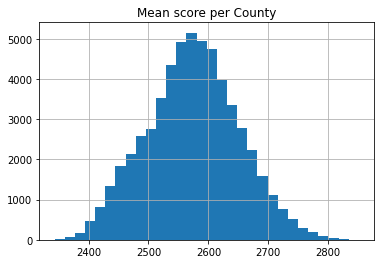

In [142]:
dfc['Mean Scale Score'].hist(bins=30)
plt.title('Mean score per County')
plt.show()

In [143]:
county_avg['Mean Scale Score'].sort_values(ascending=False).head()

County_Name
Santa Cruz     2631.624291
Santa Clara    2626.133450
Napa           2625.910870
Alameda        2611.283106
San Mateo      2611.015370
Name: Mean Scale Score, dtype: float64

In [144]:
c_avg_scale = county_avg.copy()
# save cols and index
summary_index = county_avg.index
summary_cols= county_avg.columns

In [135]:
c_avg_scale.max()

Avg_21                               1.805507e+06
Mean Scale Score                     2.631624e+03
Percentage Standard Exceeded         3.451672e+01
Percentage Standard Met              2.805591e+01
Percentage Standard Met and Above    6.105628e+01
Percentage Standard Nearly Met       4.721278e+01
Percentage Standard Not Met          5.807215e+01
Enrollment                           1.674130e+03
Free_Meal_count                      8.697283e+02
Percent_Eligible                     7.054993e-01
FRPM_Count                           1.001485e+03
Percent_Eligible_FRPM                7.940036e-01
Free_Meal_Count                      8.462053e+02
Percent_Eligible_Free                7.124270e-01
Grocery_3mile                        5.000000e+01
Grocery_dist                         3.303195e+03
dtype: float64

In [145]:
c_avg_scale = scale(c_avg_scale)

/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [146]:
c_avg_df= pd.DataFrame(c_avg_scale,columns=summary_cols)
c_avg_df.head()

,Avg_21,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Enrollment,Free_Meal_count,Percent_Eligible,...,Highest Entry Level Step,Highest Salary Offered,EDP 365,Current\nExpense ADA,Current\nExpense Per ADA,Estimated Total Population,Estimated Population 5-17,est_num_u17_pov,Grocery_3mile,Grocery_dist
0,1.360695,1.470945,1.627899,0.157788,1.280271,-0.961773,-0.919969,0.948443,-0.186569,-0.674107,...,-0.308720,1.147133,0.244498,0.300119,0.064692,0.247762,0.288064,0.086381,1.851258,0.281815
1,-0.432017,-1.222244,-0.952629,-1.851030,-1.370941,0.276597,1.323799,-0.685925,-0.845462,-0.825247,...,-0.355898,-0.960490,-0.244403,-0.251516,-1.408066,-0.254813,-0.240101,-0.214240,-0.718025,-1.151557
2,-0.574753,-0.277160,-0.352469,0.653181,-0.034176,-0.148097,0.102697,-0.156089,-0.087798,0.526354,...,0.814953,0.196678,-0.187459,-0.194950,-0.100978,-0.204332,-0.185342,-0.152691,0.364572,-0.007092
3,-0.675768,-0.521998,-1.089400,0.814363,-0.531589,0.804632,0.199848,-0.451355,-0.623217,-0.798081,...,1.600225,-0.845376,-0.261987,-0.280551,-1.284142,-0.293139,-0.257982,-0.215874,-1.223540,1.608289
4,-0.776929,-0.492994,-0.582815,0.616741,-0.220391,-0.829713,0.605680,-1.248890,-1.010022,0.590134,...,0.035326,-0.179327,-0.284677,-0.315559,-1.206058,-0.343991,-0.296939,-0.248368,-0.882640,-0.326466


In [147]:
# check centered
print(c_avg_df.mean()[:3])
print(c_avg_df.std(ddof=0)[:3])

Avg_21                          3.505967e-17
Mean Scale Score               -3.505967e-17
Percentage Standard Exceeded   -2.337312e-17
dtype: float64
Avg_21                          1.0
Mean Scale Score                1.0
Percentage Standard Exceeded    1.0
dtype: float64


In [113]:
for i in c_avg_df.columns.values:
    c_avg_df[i]=c_avg_df[i].fillna(np.mean)


## Calculate PCA transformation

In [151]:
c_pca = PCA().fit(c_avg_scale)

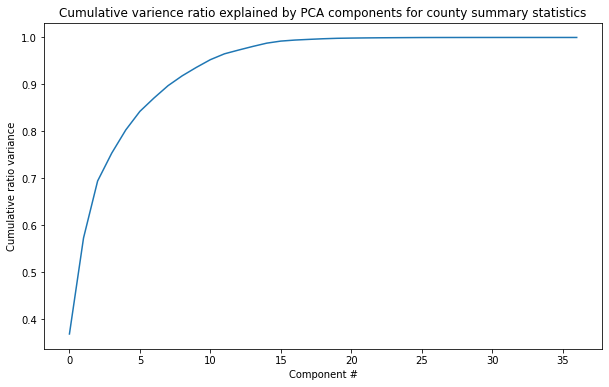

In [154]:
plt.subplots(figsize=(10, 6))
plt.plot(c_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative varience ratio explained by PCA components for county summary statistics')
plt.show()

In [156]:
c_pca_x = c_pca.transform(c_avg_scale)
c_pca_x.shape

(57, 37)

In [165]:
pca_df = pd.DataFrame({'PC1':c_pca_x[:,0],'PC2':c_pca_x[:,1],
                       'County_avg_MS_Score':county_avg['Mean Scale Score']},index=summary_index)
pca_df['Quartile']=pd.qcut(pca_df['County_avg_MS_Score'],q=4,precision=1)
pca_df.head()

,PC1,PC2,County_avg_MS_Score,Quartile
County_Name,,,,
Alameda,3.164250,4.082386,2611.283106,"(2589.0, 2631.6]"
Amador,-3.702949,-1.502754,2532.600000,"(2503.3, 2549.5]"
Butte,-1.116700,-0.695469,2560.211181,"(2549.5, 2565.3]"
Calaveras,-2.753052,-0.544086,2553.058108,"(2549.5, 2565.3]"
Colusa,-3.276274,-1.103869,2553.905479,"(2549.5, 2565.3]"


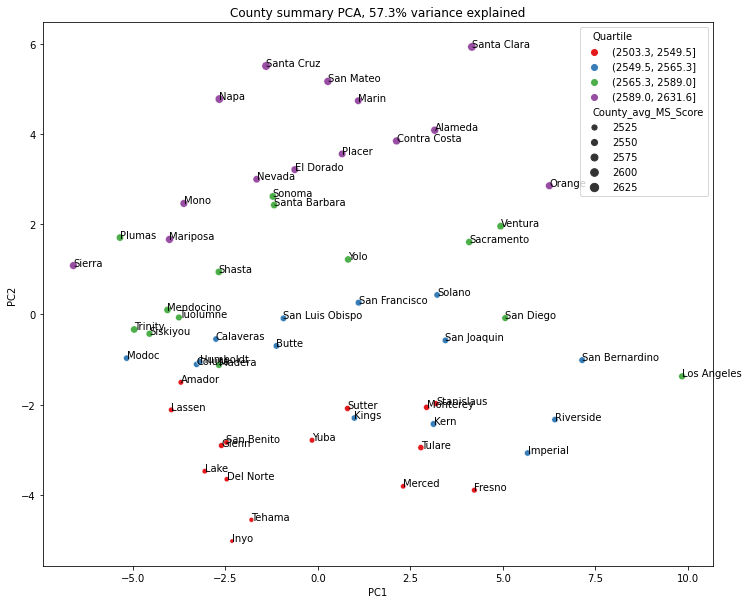

In [175]:
x = pca_df.PC1
y = pca_df.PC2
county = pca_df.index
pc_var=100*c_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(12, 10))
# Note the argument below to make sure we get the colours in the ascending
# order we intuitively expect!
sns.scatterplot(x=x, y=y, size=pca_df['County_avg_MS_Score'], hue=pca_df['Quartile'], palette='Set1',
                hue_order=pca_df.Quartile.cat.categories, data=pca_df)
#and we can still annotate with the state labels
for s, x, y in zip(county, x, y):
    plt.annotate(s, (x, y))   
plt.title(f'County summary PCA, {pc_var:.1f}% variance explained')
plt.show()

## Insight

- With just over 50 % of the variation amongst the features in the state average represented in the scatter of the first two principal components there seems to be a clear distinctions beween counties. Smaller rural counties are lower and to the left while urban or affluent counties are at the top and towards the right. 
- Sierra county is the fartherst to the left of the first princical component while los Angeles county is the furthest to the right.
- This initial graphs give me some basic trends to look into deeper while continuing the Exploratory Ananlysis of the data. 

In [5]:
## 2.1 Data Structure 

### 2.1.1 Data Gap Visual 

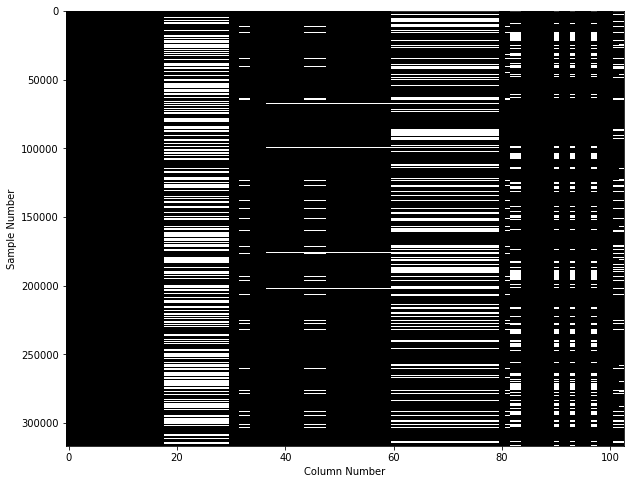

In [58]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

for boxplots - 
highest grade = type of school ( map this)
student group
avg21 /1000 ( to scale to other features)
grocery 3 mile (scaled x 100 to get to k area)
mean test score
% exceeds
% lowest
'Enrollment', 'Free_Meal_count',
       'Percent_Eligible', 'FRPM_Count',
    'Total Students, All Grades (Includes AE) [Public School] 2020-21',


In [ ]:
## by county average box plots 

In [59]:
df['Test ID'].unique()

array(['English Language Arts/Literacy', 'Mathematics'], dtype=object)

In [6]:
df.columns.values

array(['Unnamed: 0', 'County Code', 'District Code', 'School Code',
       'Student Group ID', 'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Grade', 'Test ID',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above',
       'Percentage Standard Nearly Met', 'Percentage Standard Not Met',
       'Students with Scores', 'Area 1 Percentage Above Standard',
       'Area 1 Percentage Near Standard',
       'Area 1 Percentage Below Standard',
       'Area 2 Percentage Above Standard',
       'Area 2 Percentage Near Standard',
       'Area 2 Percentage Below Standard',
       'Area 3 Percentage Above Standard',
       'Area 3 Percentage Near Standard',
       'Area 3 Percentage Below Standard',
       'Area 4 Percentage Above Standard',
       'Area 4 Percentage Near Standard',
       'Area 4 Percentage Below Standard', 'County Nam

In [14]:
 df['School Type [Public School] 2020-21'].value_counts()

1-Regular school              231156
4-Alternative/other school      9200
2-Special education school       247
Name: School Type [Public School] 2020-21, dtype: int64

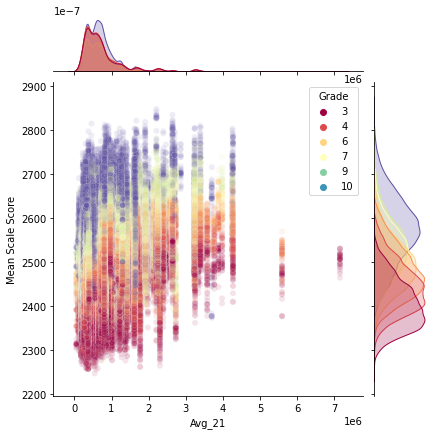

In [81]:

sns.jointplot(x= 'Avg_21', y='Mean Scale Score', hue='Grade',palette="Spectral",data=df, alpha = 0.1)


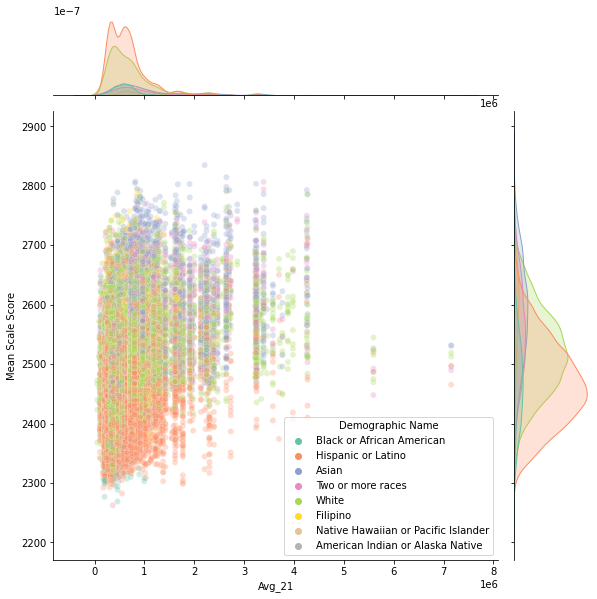

In [146]:
dfs = df[df['Student Group']=='Race and Ethnicity']
sns.jointplot(x= 'Avg_21', y='Mean Scale Score', hue='Demographic Name',palette="Set2",height=8.27,data=dfs, alpha = 0.3)


Los angeles and san mateo have the highest average housing prices in 21 and can be seen
on the right side of the scatter plot 

In [151]:
df[df['Avg_21']>5000000]['County Name_x'].value_counts()

Los Angeles    115
San Mateo       42
Name: County Name_x, dtype: int64

In [ ]:
The counties with the average housing prices below 200 thousand are below 

In [155]:
df[df['Avg_21']<200000]['County Name_x'].value_counts()

Kern              1518
Tulare             584
Kings              549
San Bernardino     529
Modoc              451
Fresno             329
Imperial           280
Lassen             224
Shasta             191
Siskiyou           176
Name: County Name_x, dtype: int64

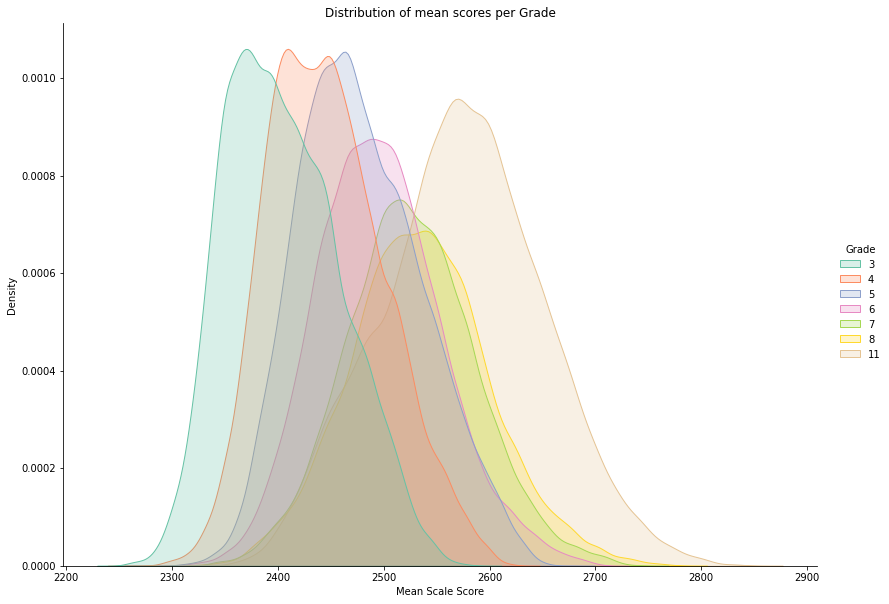

In [87]:


sns.displot(df,x="Mean Scale Score", hue="Grade", kind="kde",palette="Set2",height=8.27, aspect=11.7/8.27, fill=True).set(title='Distribution of mean scores per Grade')
plt.show()


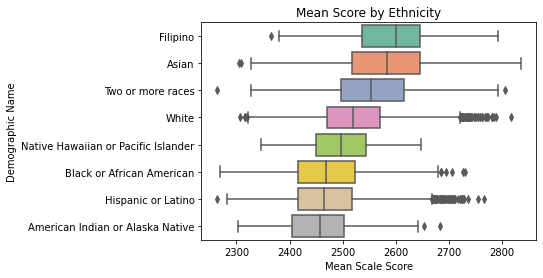

In [156]:
dfs = df[df['Student Group']=='Race and Ethnicity']
order = dfs.groupby( "Demographic Name")['Mean Scale Score'].mean().sort_values(ascending=False).index
ax = sns.boxplot(x="Mean Scale Score", y="Demographic Name",orient='h',order=order, palette="Set2", data=dfs).set(title='Mean Score by Ethnicity')


In [103]:
df[df["Student Group"]=='Economic Status']['Demographic Name'].value_counts()

Economically disadvantaged        13737
Not economically disadvantaged    11796
Name: Demographic Name, dtype: int64

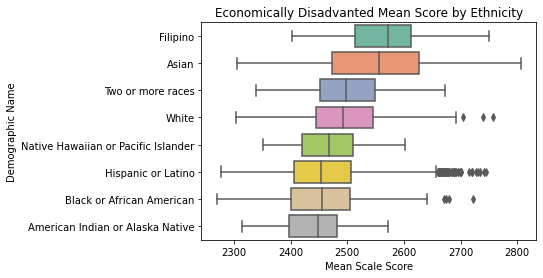

In [121]:
dfs = df[df['Student Group']=='Ethnicity for Economically Disadvantaged']
order = dfs.groupby( "Demographic Name")['Mean Scale Score'].mean().sort_values(ascending=False).index
ax = sns.boxplot(x="Mean Scale Score", y="Demographic Name",order=order,orient='h', palette="Set2", data=dfs).set(title='Economically Disadvanted Mean Score by Ethnicity')



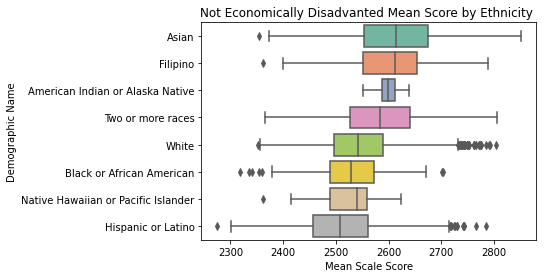

In [157]:
dfs = df[df['Student Group']=='Ethnicity for Not Economically Disadvantaged']
order = dfs.groupby( "Demographic Name")['Mean Scale Score'].mean().sort_values(ascending=False).index
ax = sns.boxplot(x="Mean Scale Score", y="Demographic Name",order=order,orient='h', palette="Set2", data=dfs).set(title='Not Economically Disadvanted Mean Score by Ethnicity ')

In [158]:
df['Student Group'].value_counts()

English-Language Fluency                        65038
Parent Education                                40179
Race and Ethnicity                              30222
Gender                                          29566
Economic Status                                 25533
Disability Status                               21855
Homeless Status                                 17911
Military Status                                 17496
Ethnicity for Not Economically Disadvantaged    17452
Migrant                                         17365
All Students                                    17093
Ethnicity for Economically Disadvantaged        16973
Name: Student Group, dtype: int64

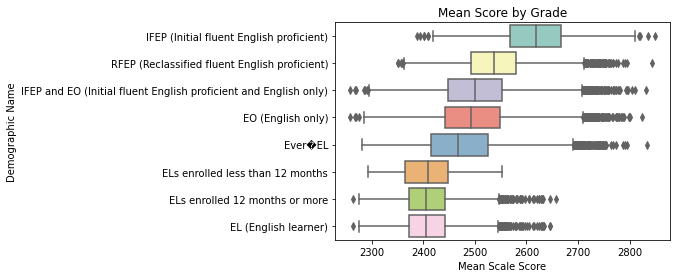

In [168]:
dfs = df[df['Student Group']=='English-Language Fluency']
order = dfs.groupby( "Demographic Name")['Mean Scale Score'].mean().sort_values(ascending=False).index
ax = sns.boxplot(x="Mean Scale Score", y="Demographic Name",order=order,orient='h', palette="Set3", data=dfs).set(title='Mean Score by Grade')


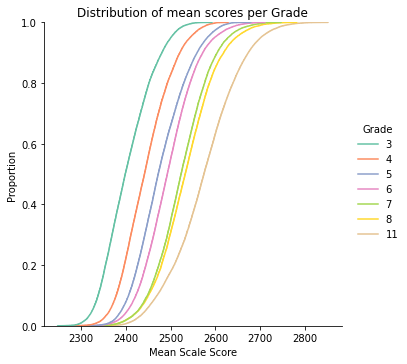

In [88]:


sns.displot(df,x="Mean Scale Score", hue="Grade", kind="ecdf",palette="Set2").set(title='Distribution of mean scores per Grade')


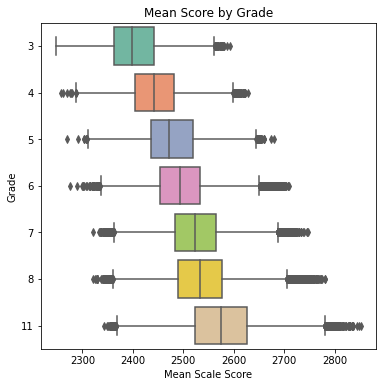

In [46]:
fig,ax = plt.subplots(figsize=(6,6))
ax = sns.boxplot(x="Mean Scale Score", y="Grade",orient='h', palette="Set2", data=df).set(title='Mean Score by Grade')


In [51]:
df['Student Group ID'].value_counts()[:5]

1     17093
29    17082
51    17059
53    17009
99    16744
Name: Student Group ID, dtype: int64

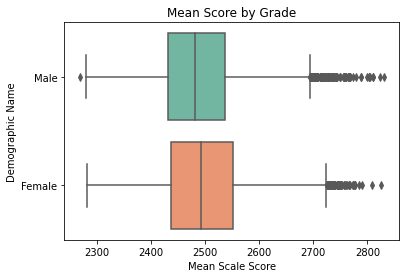

In [54]:
dfs = df[df['Student Group']=='Gender']

ax = sns.boxplot(x="Mean Scale Score", y="Demographic Name",orient='h', palette="Set2", data=dfs).set(title='Mean Score by Grade')


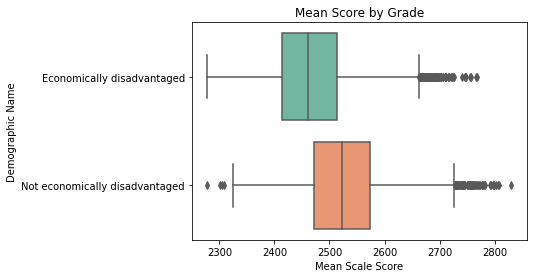

In [55]:
dfs = df[df['Student Group']=='Economic Status']

ax = sns.boxplot(x="Mean Scale Score", y="Demographic Name",orient='h', palette="Set2", data=dfs).set(title='Mean Score by Grade')


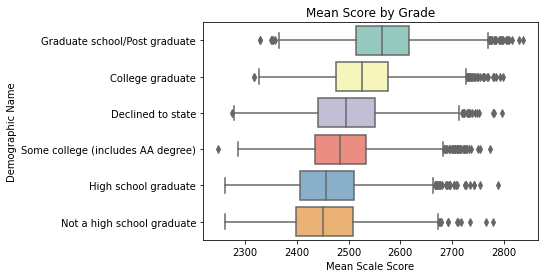

In [129]:
dfs = df[df['Student Group']=='Parent Education']
order = dfs.groupby( "Demographic Name")['Mean Scale Score'].mean().sort_values(ascending=False).index
ax = sns.boxplot(x="Mean Scale Score", y="Demographic Name",orient='h', order=order,palette="Set3", data=dfs).set(title='Mean Score by Grade')


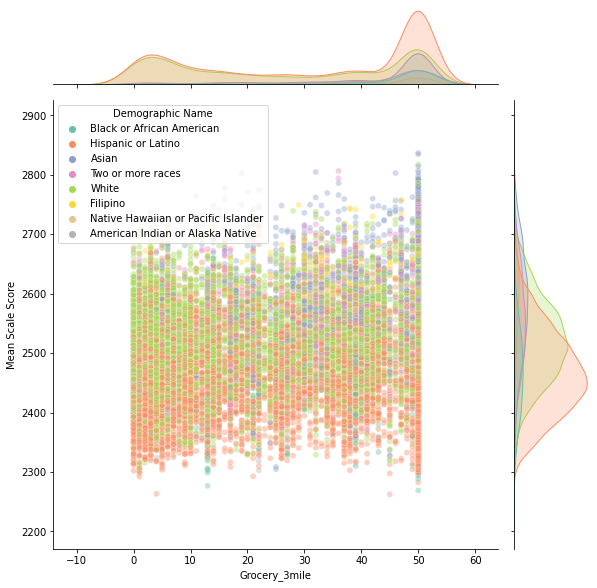

In [92]:
dfs = df[df['Student Group']=='Race and Ethnicity']

sns.jointplot(x= 'Grocery_3mile', y='Mean Scale Score', hue="Demographic Name", palette="Set2",height=8.27,data=dfs, alpha = 0.4)

#               hue=School Type [Public School] 2020-21',palette="viridis",

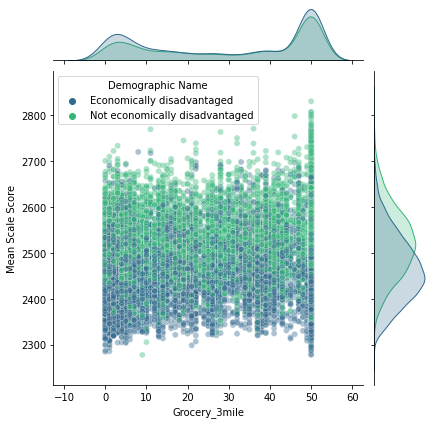

In [79]:
dfs = df[df['Student Group']=='Economic Status']

sns.jointplot(x= 'Grocery_3mile', y='Mean Scale Score', hue="Demographic Name",palette="viridis",data=dfs, alpha = 0.4)

#               hue=School Type [Public School] 2020-21',palette="viridis",

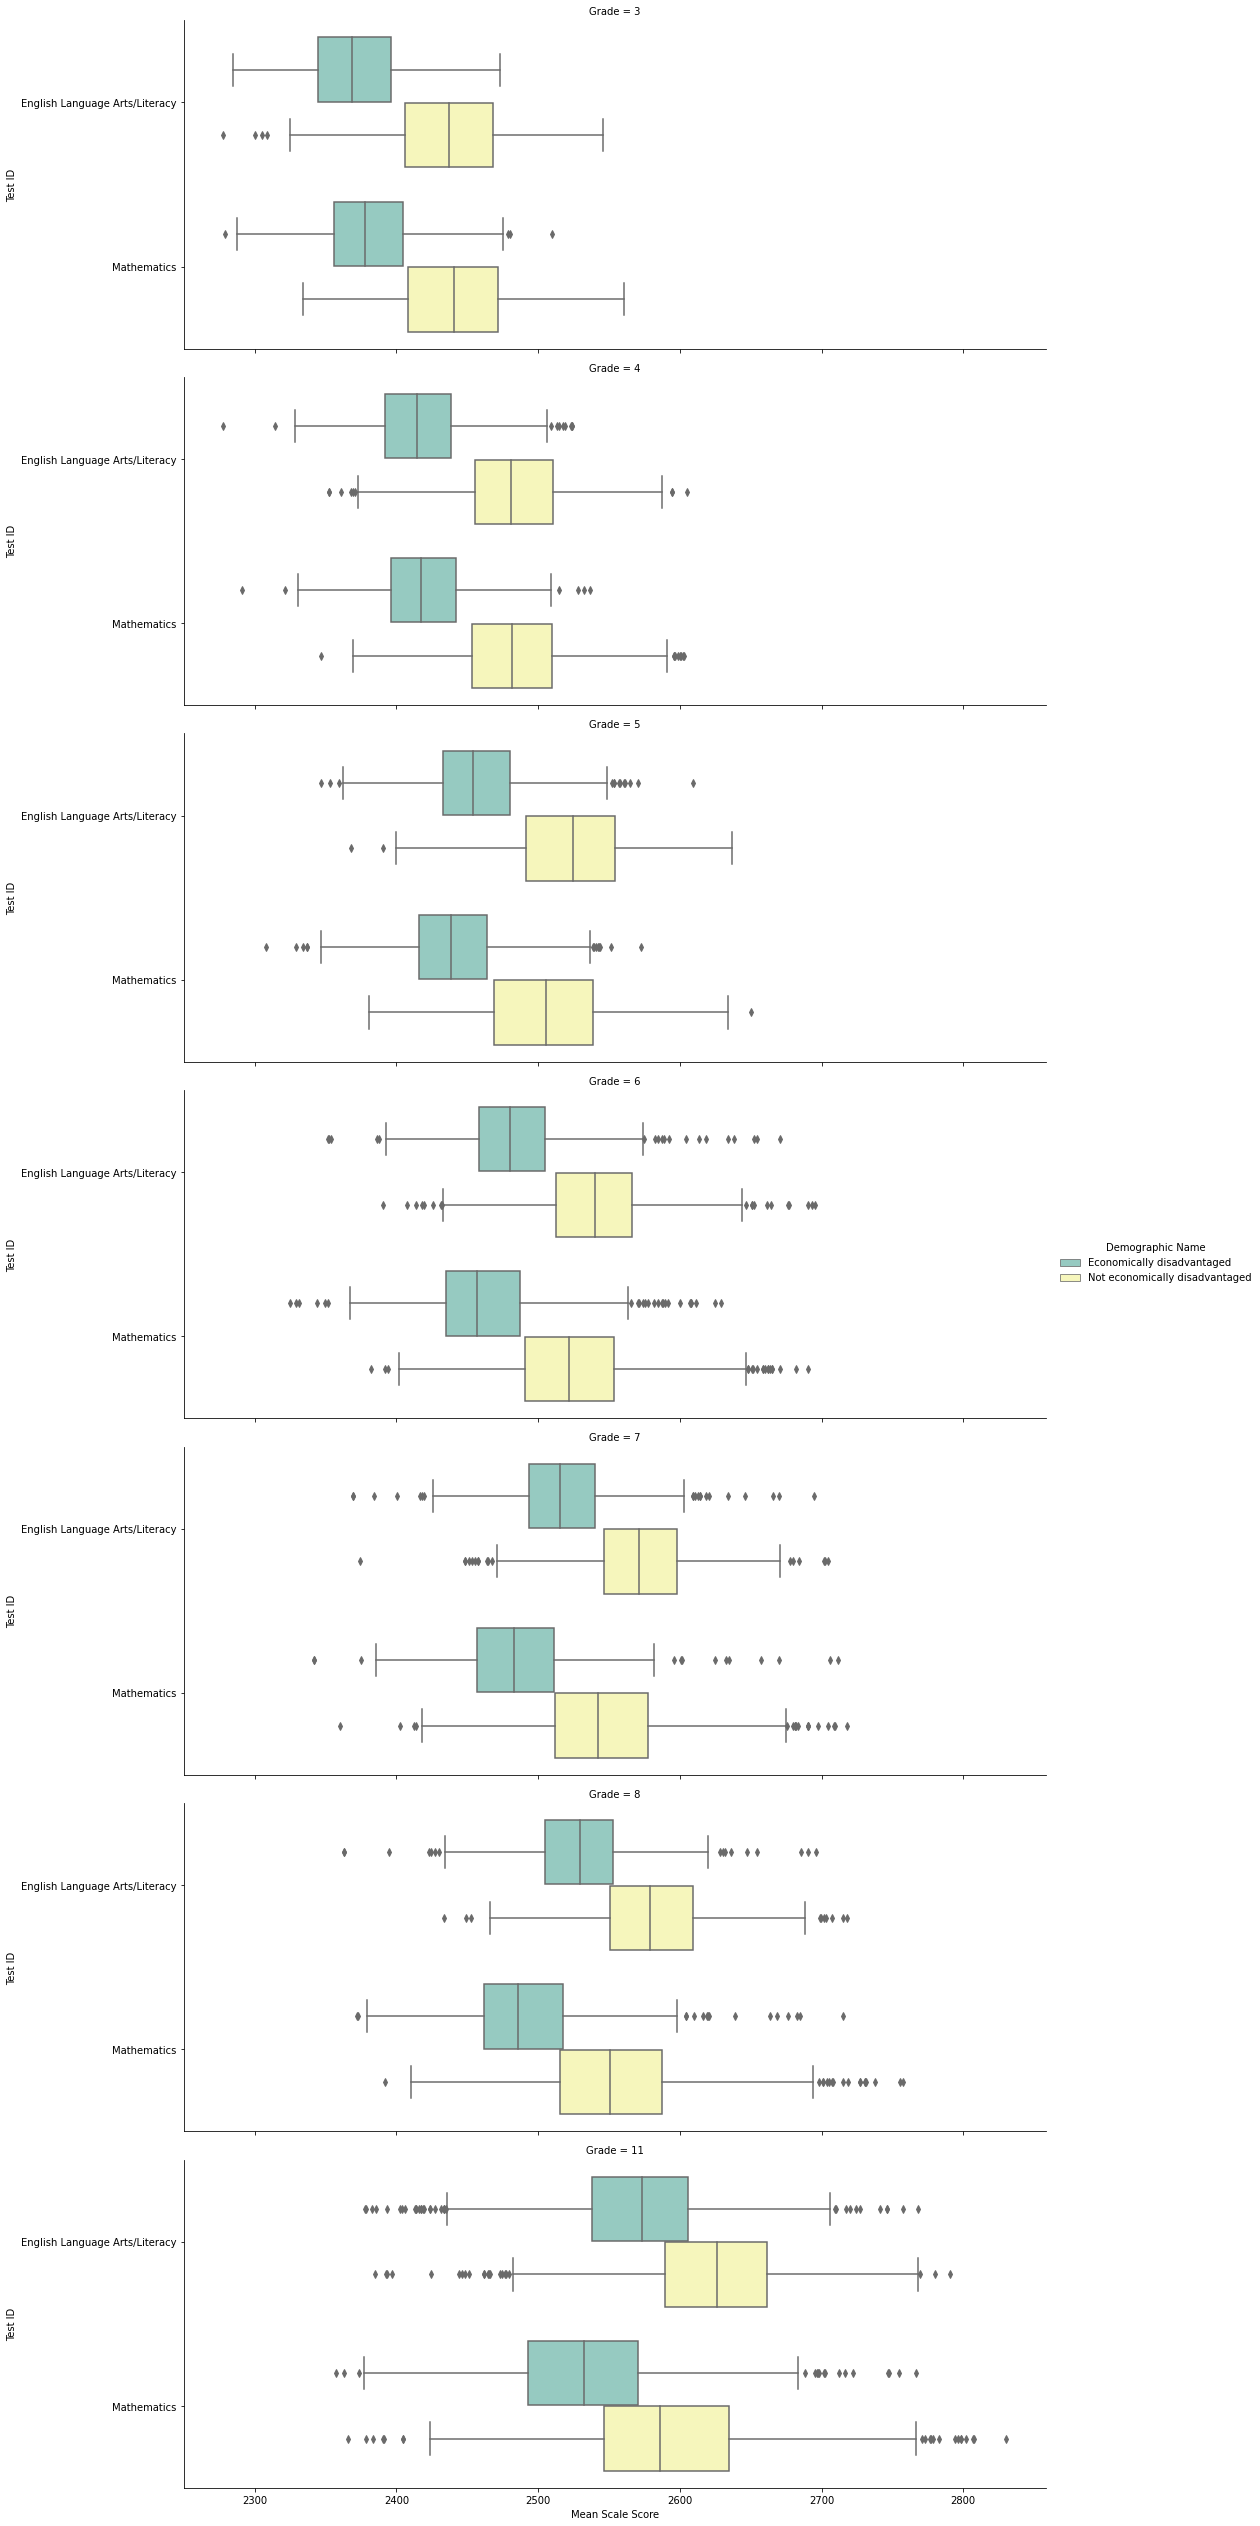

In [127]:
dfs = df[df['Student Group']=='Economic Status']
g = sns.catplot(y="Test ID", x="Mean Scale Score",
                hue="Demographic Name", col='Grade',
                data=dfs, kind="box",
                col_wrap=1,
                orient="h", height=5, aspect=3,palette='Set3'
               )

In [139]:
df[df["Student Group"]=='English-Language Fluency']['Demographic Name'].value_counts()

IFEP and EO (Initial fluent English proficient and English only)    16622
EO (English only)                                                   15456
Ever�EL                                                             10525
EL (English learner)                                                 7083
ELs enrolled 12 months or more                                       6985
RFEP (Reclassified fluent English proficient)                        6645
IFEP (Initial fluent English proficient)                             1703
ELs enrolled less than 12 months                                       19
Name: Demographic Name, dtype: int64

In [53]:
df['Demographic Name'].value_counts()

Hispanic or Latino                                                  28654
White                                                               19813
All Students                                                        17093
Not migrant education                                               17082
Not armed forces family member                                      17059
Not homeless                                                        17009
No reported disabilities                                            16744
IFEP and EO (Initial fluent English proficient and English only)    16622
EO (English only)                                                   15456
Male                                                                14930
Female                                                              14636
Economically disadvantaged                                          13737
Not economically disadvantaged                                      11796
Ever�EL                               

In [37]:
df['Grades 9-12 Students [Public School] 2020-21'].value_counts()

†      192215
374       298
–         261
159       219
535       218
        ...  
39          6
40          6
48          6
111         6
83          5
Name: Grades 9-12 Students [Public School] 2020-21, Length: 783, dtype: int64

In [40]:
df['Grades 9-12 Students [Public School] 2020-21'] = df['Grades 9-12 Students [Public School] 2020-21'].apply(pd.to_numeric,errors='coerce')

In [45]:
df['High Grade'] = df['High Grade'].apply(pd.to_numeric,errors='coerce')

/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


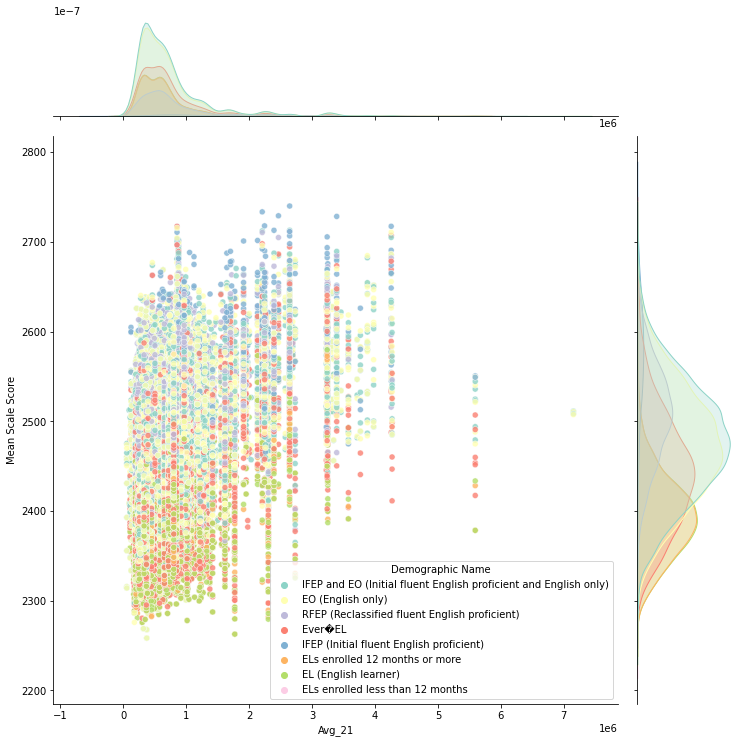

In [207]:
dfh = df[(df['Grade']<8)&(df['Student Group']=='English-Language Fluency')]
order = dfh.groupby( "Demographic Name")['Mean Scale Score'].mean().sort_values(ascending=False).index
sns.jointplot(x= 'Avg_21', y='Mean Scale Score',
              hue='Demographic Name',
              data=dfh,kind="scatter", palette="Set3",height=10.27, alpha = 0.8)


/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


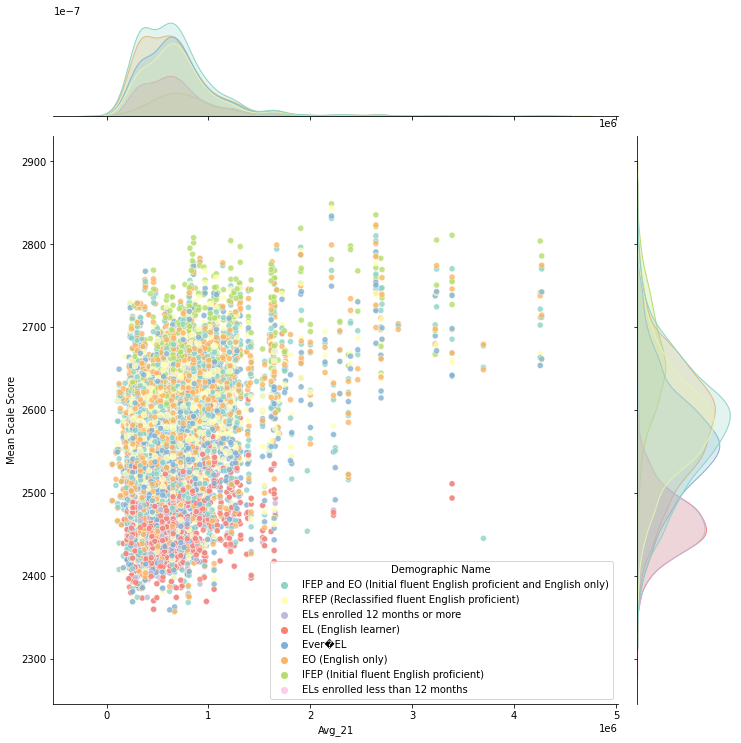

In [205]:
dfh = df[(df['Grade']>8)&(df['Student Group']=='English-Language Fluency')]
sns.jointplot(x= 'Avg_21', y='Mean Scale Score',
              hue='Demographic Name',
              data=dfh,kind="scatter", palette="Set3",height=10.27, alpha = 0.8)


In [42]:
df['High Grade'].value_counts()

8        116668
12        77938
5         58694
6         48143
Adult      8598
4          1282
7          1243
3          1096
9           248
11           44
1            38
Name: High Grade, dtype: int64

In [30]:
df['Grade'].value_counts()

11    56794
5     49377
4     48935
3     48073
6     41637
8     35958
7     35909
Name: Grade, dtype: int64

In [31]:
df['Student Group'].value_counts()

English-Language Fluency                        65038
Parent Education                                40179
Race and Ethnicity                              30222
Gender                                          29566
Economic Status                                 25533
Disability Status                               21855
Homeless Status                                 17911
Military Status                                 17496
Ethnicity for Not Economically Disadvantaged    17452
Migrant                                         17365
All Students                                    17093
Ethnicity for Economically Disadvantaged        16973
Name: Student Group, dtype: int64

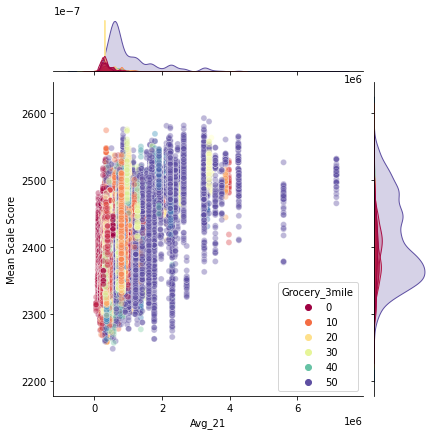

In [82]:
df3 = df[df['Grade']==3]
sns.color_palette("mako", as_cmap=True)
sns.jointplot(x= 'Avg_21', y='Mean Scale Score', hue='Grocery_3mile',palette="Spectral",data=df3, alpha = 0.4)


In [ ]:
'Average Salary Paid'

'Enrollment', 'Free_Meal_count',
       'Percent_Eligible', 'FRPM_Count', 'Percent_Eligible_FRPM',
       'Enrollment.1', 'Free_Meal_Count', 'Percent_Eligible_Free',
       'FRPM_Count.1', 'Percent_Eligible_FRPM.1',
    
    'Highest Salary Offered'

In [ ]:
# df3 = df[(df['Grade']>8)&(df['Student Group']=='Parent Education')]

# sns.jointplot(y= 'Average Salary Paid',hue='Mean Scale Score',palette='Set3', x='Avg_21',data=df3)

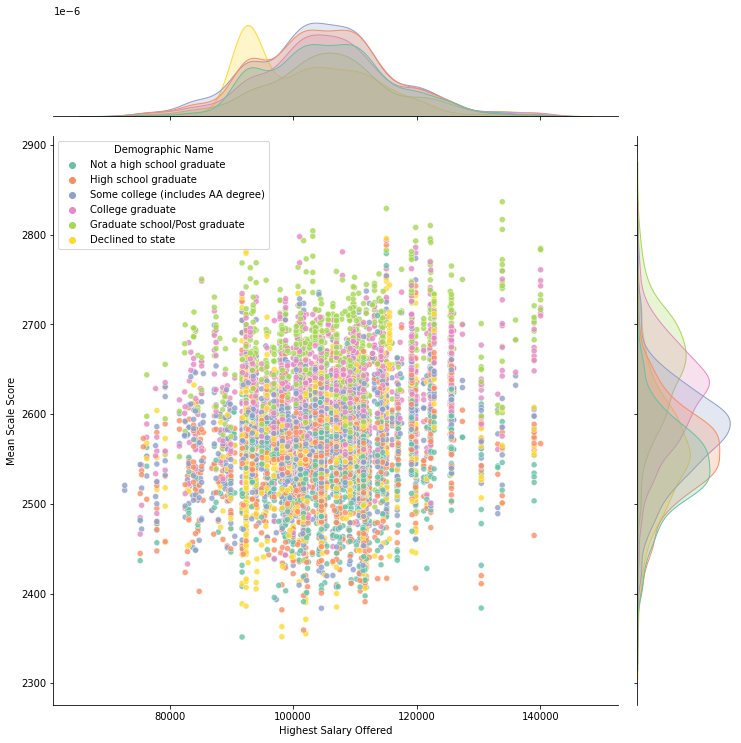

In [230]:
df3 = df[(df['Grade']>8)&(df['Student Group']=='Parent Education')]

sns.jointplot(x= 'Highest Salary Offered', y='Mean Scale Score', hue='Demographic Name',palette="Set2",data=df3,height=10.27, alpha = 0.8)

#               hue=School Type [Public School] 2020-21',palette="viridis",

In [9]:
df['Average Salary Paid'].isnull().sum()

0

In [9]:
df['Average Salary Paid'] = df['Average Salary Paid'].fillna(np.mean(df['Average Salary Paid']))

/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/si

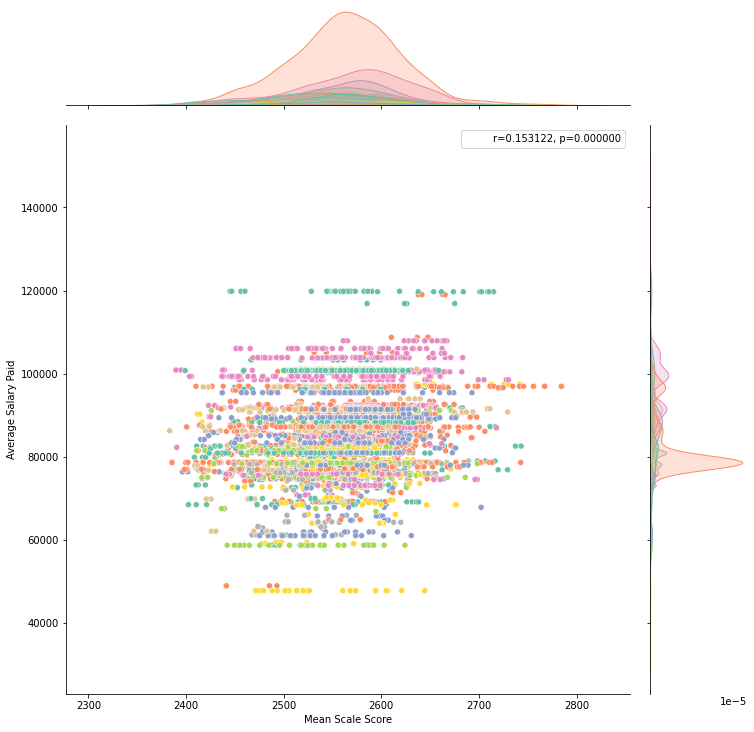

In [15]:
df3 = df[(df['Grade']>8)&(df['Demographic Name']=='Hispanic or Latino')]

graph = sns.jointplot(y= 'Average Salary Paid', x='Mean Scale Score',
                      hue='Co',palette="Set2",
#                       kind='reg',
                      data=df3,height=10.27)
r, p = stats.pearsonr(df[(df['Grade']>8)&(df['Demographic Name']=='Hispanic or Latino')]['Mean Scale Score'],df[(df['Grade']>8)&(df['Demographic Name']=='Hispanic or Latino')]['Average Salary Paid'], 
                     )
                         
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/si

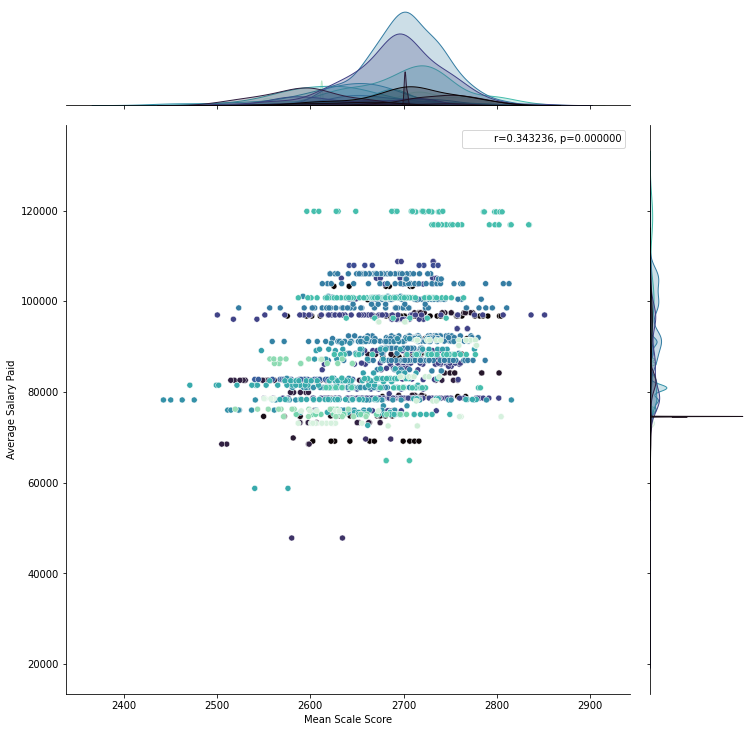

In [13]:
df3 = df[(df['Grade']>8)&(df['Demographic Name']=='Asian')]

graph = sns.jointplot(y= 'Average Salary Paid', x='Mean Scale Score',
                           hue='Co',palette="mako",
#                       kind='reg',
                      data=df3,height=10.27)
r, p = stats.pearsonr(df[(df['Grade']>8)&(df['Demographic Name']=='Asian')]['Average Salary Paid'],
                      df[(df['Grade']>8)&(df['Demographic Name']=='Asian')]['Mean Scale Score'])
                         
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/robertrustia/opt/anaconda3/lib/python3.8/si

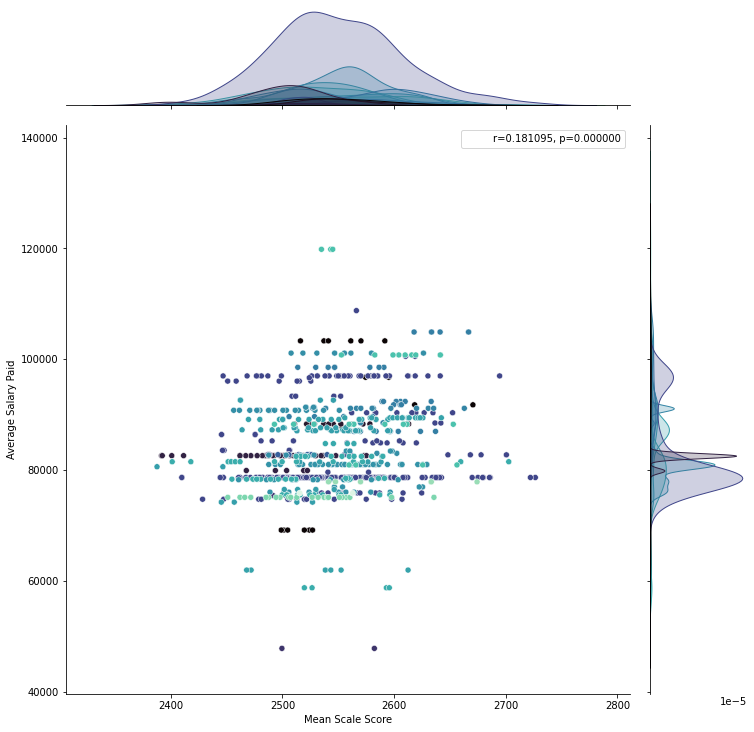

In [14]:
df3 = df[(df['Grade']>8)&(df['Demographic Name']=='Black or African American')]

graph = sns.jointplot(y= 'Average Salary Paid', x='Mean Scale Score',
                           hue='Co',palette="mako",
#                       kind='reg',
                      data=df3,height=10.27)
r, p = stats.pearsonr(df[(df['Grade']>8)&(df['Demographic Name']=='Black or African American')]['Average Salary Paid'],
                      df[(df['Grade']>8)&(df['Demographic Name']=='Black or African American')]['Mean Scale Score'])
                         
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

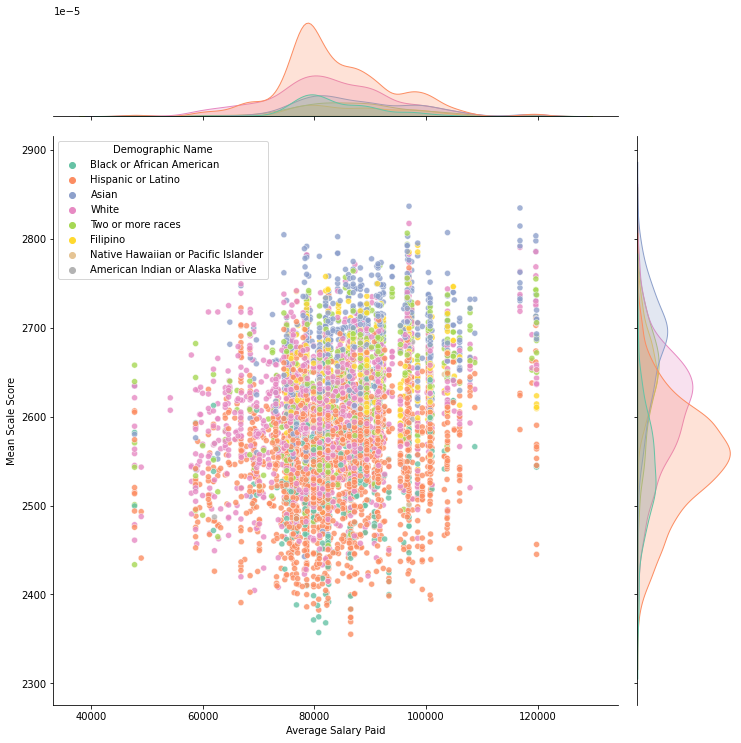

In [11]:
df3 = df[(df['Grade']>8)&(df['Student Group']=='Race and Ethnicity')]

graph = sns.jointplot(x= 'Average Salary Paid', y='Mean Scale Score', hue='Demographic Name',palette="Set2",data=df3,height=10.27, alpha = 0.8)


/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


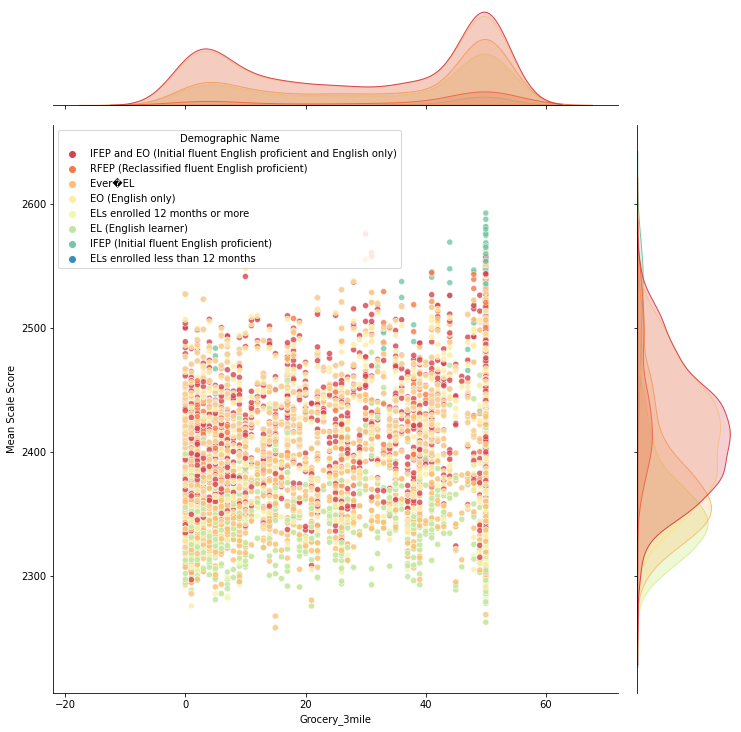

In [216]:
df3 = df[(df['Grade']==3)&(df['Student Group']=='English-Language Fluency')]

sns.jointplot(x= 'Grocery_3mile', y='Mean Scale Score', hue='Demographic Name',palette="Spectral",data=df3,height=10.27, alpha = 0.8)

#               hue=School Type [Public School] 2020-21',palette="viridis",

In [ ]:
sns.pairplot(
    df_X, plot_kws={"s": 3, "alpha": 0.2}, hue="Police_Force", palette="Spectral",
    x_vars=["Location_Easting_OSGR", "Location_Northing_OSGR", "Longitude"],
    y_vars="Latitude");



In [ ]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df_X, x=col, y=df_X["Latitude"], palette="Set2",
                   split=True, hue="Urban_or_Rural_Area", ax=ax)
plt.tight_layout();

In [ ]:
# Specify features of interest
selected_features = ["Vehicle_Reference_df_res", "Towing_and_Articulation",
                     "Skidding_and_Overturning", "Bus_or_Coach_Passenger",
                     "Pedestrian_Road_Maintenance_Worker", "Age_Band_of_Driver"]

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax,
                  palette="tab10", size=2, alpha=0.5)
plt.tight_layout();


In [ ]:
# Specify features of interest
selected_features = ["Vehicle_Reference_df_res", "Towing_and_Articulation",
                     "Skidding_and_Overturning", "Bus_or_Coach_Passenger",
                     "Pedestrian_Road_Maintenance_Worker", "Age_Band_of_Driver"]

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax,
                  palette="tab10", size=2, alpha=0.5)
plt.tight_layout();

In [34]:
swh=pd.read_csv('../../data/by_student_group/dfs_dist_housing.csv',low_memory=False)
swh.drop(columns=['Unnamed: 0'])

,County Code,District Code,School Code,Student Group ID,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,Students Enrolled,Students Tested,...,2020–21 P‑2 ADA,% Salary Change Over 2019–20,CDS,EDP 365,Current\nExpense ADA,Current\nExpense Per ADA,LEA Type,Estimated Total Population,Estimated Population 5-17,est_num_u17_pov
0,1,10017,112607,1,108.0,106.0,6,English Language Arts/Literacy,21.0,20.0,...,18860.292764,3.017373,NaN,2.857007e+08,18835.046896,13998.450902,NaN,184134.978840,26713.578130,3044.345812
1,1,10017,112607,6,93.0,91.0,6,English Language Arts/Literacy,18.0,17.0,...,18860.292764,3.017373,NaN,2.857007e+08,18835.046896,13998.450902,NaN,184134.978840,26713.578130,3044.345812
2,1,10017,112607,29,108.0,106.0,6,English Language Arts/Literacy,21.0,20.0,...,18860.292764,3.017373,NaN,2.857007e+08,18835.046896,13998.450902,NaN,184134.978840,26713.578130,3044.345812
3,1,10017,112607,31,80.0,78.0,6,English Language Arts/Literacy,14.0,13.0,...,18860.292764,3.017373,NaN,2.857007e+08,18835.046896,13998.450902,NaN,184134.978840,26713.578130,3044.345812
4,1,10017,112607,51,108.0,106.0,6,English Language Arts/Literacy,21.0,20.0,...,18860.292764,3.017373,NaN,2.857007e+08,18835.046896,13998.450902,NaN,184134.978840,26713.578130,3044.345812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316678,58,72751,6118806,6,31.0,31.0,4,Mathematics,14.0,13.0,...,8547.131947,0.066064,NaN,1.083580e+08,8547.636272,13073.661487,NaN,60863.698388,11812.984664,2401.075108
316679,58,72751,6118806,29,31.0,31.0,4,Mathematics,14.0,13.0,...,8547.131947,0.066064,NaN,1.083580e+08,8547.636272,13073.661487,NaN,60863.698388,11812.984664,2401.075108
316680,58,72751,6118806,53,29.0,29.0,4,Mathematics,12.0,11.0,...,8547.131947,0.066064,NaN,1.083580e+08,8547.636272,13073.661487,NaN,60863.698388,11812.984664,2401.075108
316681,58,72751,6118806,99,26.0,26.0,4,Mathematics,13.0,12.0,...,8547.131947,0.066064,NaN,1.083580e+08,8547.636272,13073.661487,NaN,60863.698388,11812.984664,2401.075108


In [36]:
swh['LEA Type'].value_counts()

Unified       168181
Elementary     54400
High           14373
Name: LEA Type, dtype: int64

In [ ]:
## need to add student group, district, zip code,
##grocery_store, park, fast_food, distance

In [35]:
swh.columns.values

array(['Unnamed: 0', 'County Code', 'District Code', 'School Code',
       'Student Group ID', 'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Grade', 'Test ID',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above',
       'Percentage Standard Nearly Met', 'Percentage Standard Not Met',
       'Students with Scores', 'Area 1 Percentage Above Standard',
       'Area 1 Percentage Near Standard',
       'Area 1 Percentage Below Standard',
       'Area 2 Percentage Above Standard',
       'Area 2 Percentage Near Standard',
       'Area 2 Percentage Below Standard',
       'Area 3 Percentage Above Standard',
       'Area 3 Percentage Near Standard',
       'Area 3 Percentage Below Standard',
       'Area 4 Percentage Above Standard',
       'Area 4 Percentage Near Standard',
       'Area 4 Percentage Below Standard', 'County Nam

## convert student group to numeric 

In [54]:
convert= [ 'Pupil/Teacher Ratio [Public School] 2020-21',
       'Hispanic - male [Public School] 2020-21',
       'Hispanic - female [Public School] 2020-21',
       'Black or African American - male [Public School] 2020-21',
       'Black or African American - female [Public School] 2020-21',
       'Asian or Asian/Pacific Islander - male [Public School] 2020-21',
       'Asian or Asian/Pacific Islander - female [Public School] 2020-21',
       'National School Lunch Program [Public School] 2020-21',
   ]

In [55]:
swh[convert] = swh[convert].apply(pd.to_numeric,errors='coerce')

In [60]:
columns = swh[['County Name_x',
       'District Name_x', 'School Name_x', 'Zip_Code','Student Group ID', 
       'Total Tested with Scores at Reporting Level', 'Grade', 
       'Students Tested', 'Percentage Standard Met',
  'Percentage Standard Not Met','Full-Time Equivalent (FTE) Teachers [Public School] 2020-21',
       'Pupil/Teacher Ratio [Public School] 2020-21',
       'Hispanic - male [Public School] 2020-21',
       'Hispanic - female [Public School] 2020-21',
       'Black or African American - male [Public School] 2020-21',
       'Black or African American - female [Public School] 2020-21',
       'Asian or Asian/Pacific Islander - male [Public School] 2020-21',
       'Asian or Asian/Pacific Islander - female [Public School] 2020-21',
      'Avg_21','School Type [Public School] 2020-21', 'Latitude', 'Longitude',
       'Percentage Standard Exceeded','Estimated Population 5-17',
       'est_num_u17_pov', 'Avg_21', 'Mean Scale Score']]

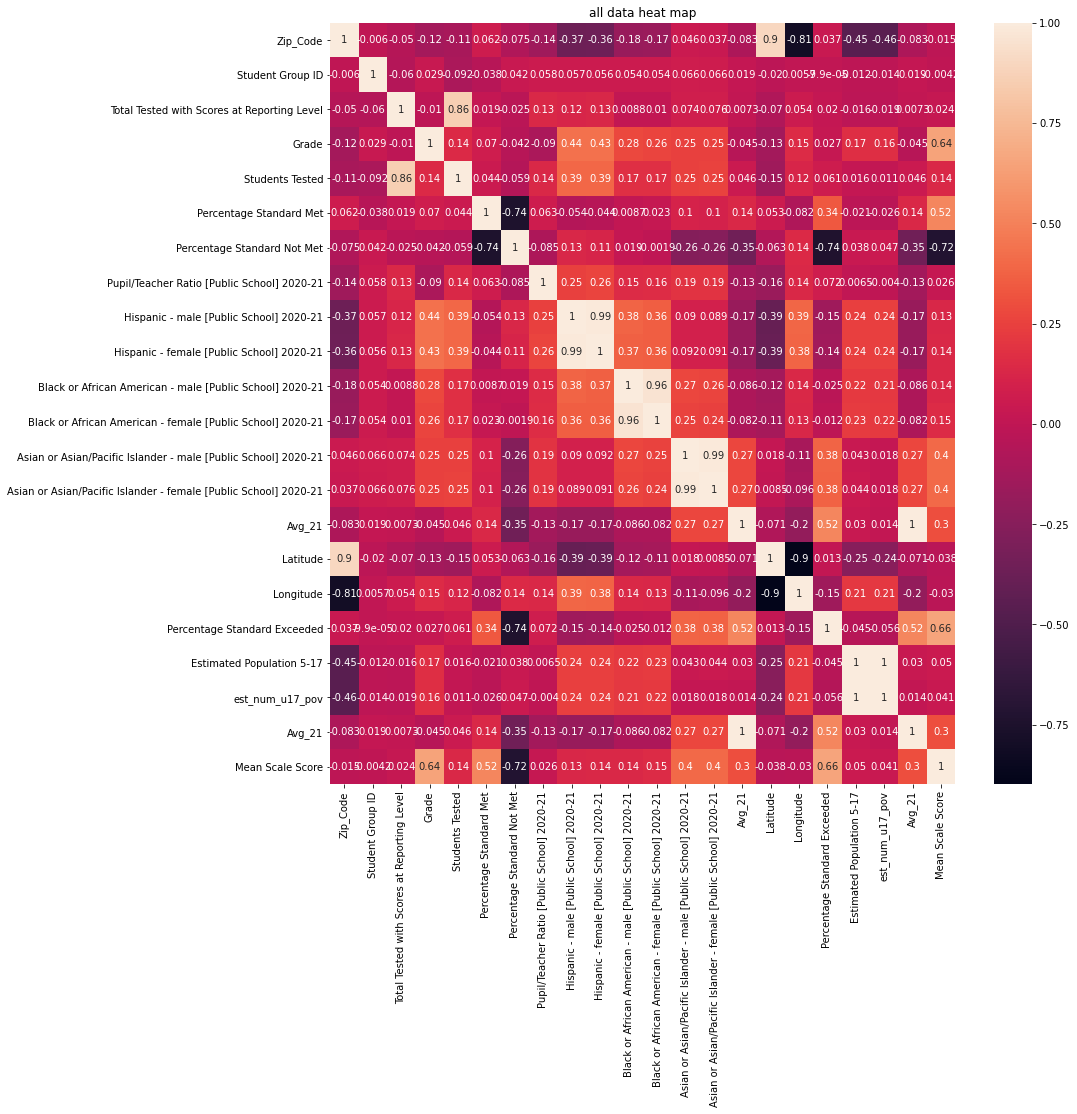

In [61]:
fig,ax = plt.subplots(figsize=(14,14))
fig=sns.heatmap(columns.corr(),annot=True)
plt.title('all data heat map')
plt.show()

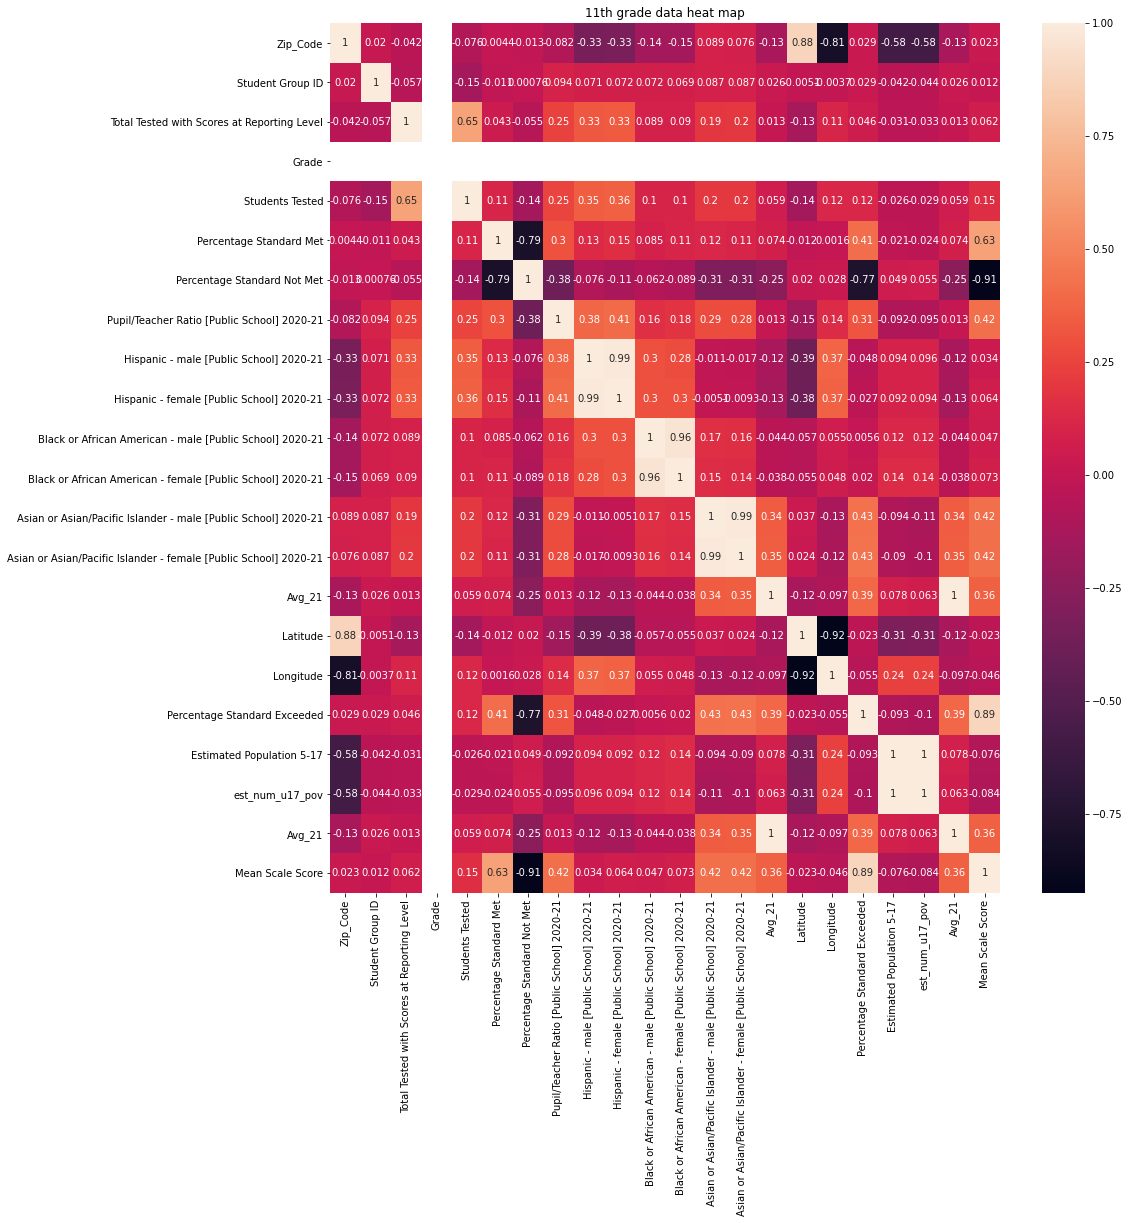

In [63]:
fig,ax = plt.subplots(figsize=(15,16))
fig=sns.heatmap(columns[columns['Grade']==11].corr(),annot=True)
plt.title('11th grade data heat map')
plt.show()

In [149]:
dabl.plot(swh[swh['Grade']==11][['Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met','Mean Scale Score',
'Total Staff [District] 2020-21',
       'Paraprofessionals/Instructional Aides [District] 2020-21',
       'Total Guidance Counselors [District] 2020-21',
       'School Psychologist [District] 2020-21',
       'Other Support Services Staff [District] 2020-21', 
        'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21',
       'Estimated Total Population', 'Estimated Population 5-17',
       'est_num_u17_pov', 'Avg_21', 'City','CountyName_x' ]], target_col='Mean Scale Score')

NameError: name 'swh' is not defined

In [ ]:
dabl.plot(merg[merg['Grade']==6][['Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met','Mean Scale Score',
'Total Staff [District] 2020-21',
       'Paraprofessionals/Instructional Aides [District] 2020-21',
       'Total Guidance Counselors [District] 2020-21',
       'School Psychologist [District] 2020-21',
       'Other Support Services Staff [District] 2020-21', 
        'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21',
       'Estimated Total Population', 'Estimated Population 5-17',
       'est_num_u17_pov', 'Avg_21', 'City','CountyName' ]], target_col='Mean Scale Score')

In [ ]:
data =defenders[['pAdj_Tackle_int_blocks','pct_long_balls','Progressive_play','attacking_touches','True_tackle_pct'
]]
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sns.PairGrid(data= data,vars = ['pAdj_Tackle_int_blocks','pct_long_balls','Progressive_play','attacking_touches','True_tackle_pct'], size = 4)

# # Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'Blue')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Blues')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', );

In [ ]:
corr = defenders[['Aerial_win_pct','pAdj_Tackle_int_blocks','True_tackle_pct','pAdj_Recoveries','pct_long_balls','Progressive_play','attacking_touches','Key_pass',
 'Comp_prog','avg_shrt+med_pass_pct','Long_Cmp_pct']].corr()

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 8.5)

ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap="YlGnBu",annot=True,square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

In [ ]:
graph = defenders.loc[(df['pAdj_Tackle_int_blocks']<35)&(df['Position']=='DF')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>10)]
sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
x =graph['pAdj_Tackle_int_blocks']
y = graph['Aerial_win_pct']
p = graph['player_name']

g = sns.scatterplot(data=graph, x =x, y=y ,
                    hue='Squad_from_op',
                ax=ax).set(title='Defender Aerial win pct Vs Tackles Interceptions Blocks')
for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 77:
         plt.annotate(p, (x, y))
    if x > 13:
        plt.annotate(p,(x,y))

plt.tight_layout()